## 2D - DCT (Discrete Cosine Transform) image compression

In [1]:
from IPython.display import Image, display

Downloaded http://www.hpca.ual.es/~vruiz/images/pajarillo_512x512.png


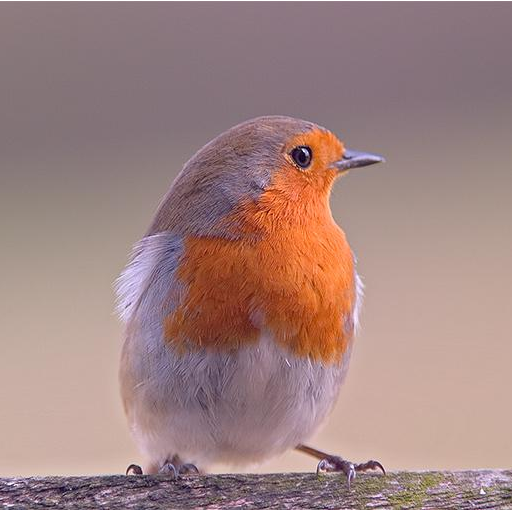

In [2]:
%run download_default_image.ipynb

In [3]:
!python ../src/2D-DCT.py -h

usage: 2D-DCT.py [-h] [-g] {encode,decode} ...

Exploiting spatial redundancy with the 2D Discrete Cosine Transform of
constant block size.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Compress data
    decode         Uncompress data

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [4]:
!python ../src/2D-DCT.py encode -h

usage: 2D-DCT.py encode [-h] [-B BLOCK_SIZE_DCT] [-t COLOR_TRANSFORM] [-p]
                        [-L LAMBDA] [-x]

options:
  -h, --help            show this help message and exit
  -B, --block_size_DCT BLOCK_SIZE_DCT
                        Block size (default: 8)
  -t, --color_transform COLOR_TRANSFORM
                        Color transform (default: "YCoCg")
  -p, --perceptual_quantization
                        Use perceptual quantization (default: "False")
  -L, --Lambda LAMBDA   Relative weight between the rate and the distortion.
                        If provided (float), the block size is RD-optimized
                        between {2**i; i=1,2,3,4,5,6,7}. For example, if
                        Lambda=1.0, then the rate and the distortion have the
                        same weight.
  -x, --disable_subbands
                        Disable the coefficients reordering in subbands
                        (default: "False")


In [5]:
%%bash
rm /tmp/encoded*
python ../src/2D-DCT.py encode
rm /tmp/decoded.png
python ../src/2D-DCT.py decode
python ../src/RDE.py

(INFO) entropy_image_coding: Written 17891 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=32, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7fc936b60fe0>)
Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='deadzone', QSS=32, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f1c0ef8ccc0>)
64 64
Code-stream file: /tmp/encoded.tif length: 17891
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 17903 bytes (0.55) bits/pixel
Decoded image: /tmp/decoded.png 104571 bytes (3.19) bits/pixel
Image

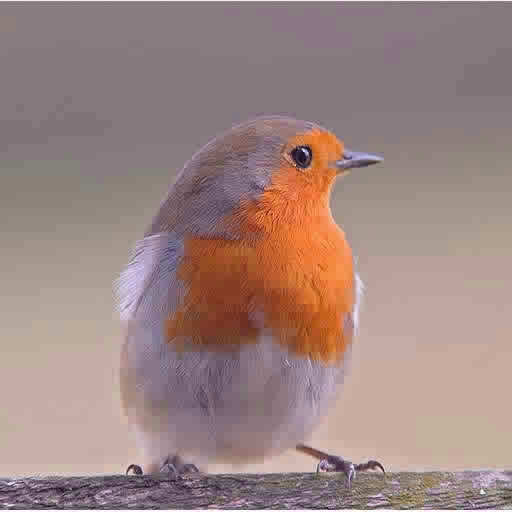

In [6]:
display(Image(filename="/tmp/decoded.png"))

### Disable the reordering of the coefficients into subbands

In [7]:
%%bash
rm /tmp/encoded*
python ../src/2D-DCT.py encode -x
rm /tmp/decoded.png
python ../src/2D-DCT.py decode -x
python ../src/RDE.py

(INFO) entropy_image_coding: Written 19095 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=True, quantizer='deadzone', QSS=32, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f7c56264fe0>)
Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=True, quantizer='deadzone', QSS=32, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f7e9a290cc0>)
Code-stream file: /tmp/encoded.tif length: 19095
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 19107 bytes (0.58) bits/pixel
Decoded image: /tmp/decoded.png 104571 bytes (3.19) bits/pixel
Images shape:

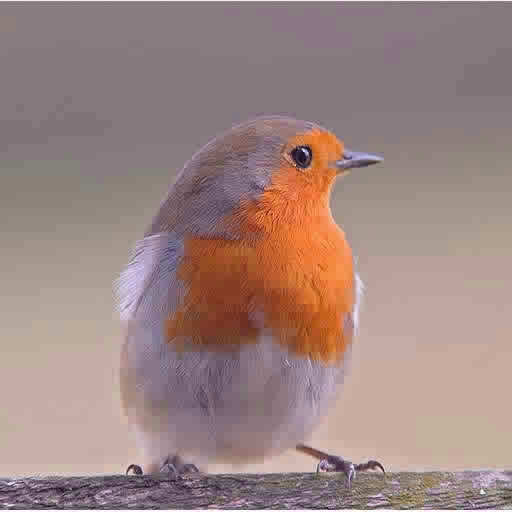

In [8]:
display(Image(filename="/tmp/decoded.png"))

### Enable perceptual quantization

In [9]:
%%bash
rm /tmp/encoded*
python ../src/2D-DCT.py encode -p -q 4 -B 32
rm /tmp/decoded.png
python ../src/2D-DCT.py decode -p -q 4 -B 32
python ../src/RDE.py

(INFO) entropy_image_coding: Written 47811 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=True, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=4, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f9855a6cfe0>)
Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=True, disable_subbands=False, quantizer='deadzone', QSS=4, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f15a318ccc0>)
16 16
Code-stream file: /tmp/encoded.tif length: 47811
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 47823 bytes (1.46) bits/pixel
Decoded image: /tmp/decoded.png 184106 bytes (5.62) bits/pixel
Images 

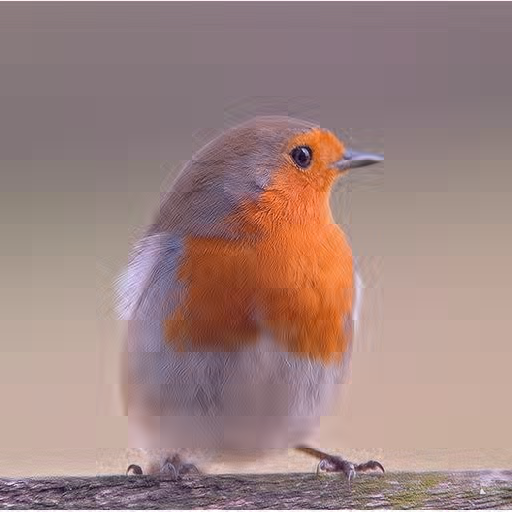

In [10]:
display(Image(filename="/tmp/decoded.png"))

###  The same, but compressing more

In [11]:
%%bash
rm /tmp/encoded*
python ../src/2D-DCT.py encode -p -q 8 -B 32
rm /tmp/decoded.png
python ../src/2D-DCT.py decode -p -q 8 -B 32
python ../src/RDE.py

(INFO) entropy_image_coding: Written 23871 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=True, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=8, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f77bfa64fe0>)
Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=True, disable_subbands=False, quantizer='deadzone', QSS=8, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7fa6d5b8ccc0>)
16 16
Code-stream file: /tmp/encoded.tif length: 23871
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 23883 bytes (0.73) bits/pixel
Decoded image: /tmp/decoded.png 155131 bytes (4.73) bits/pixel
Images 

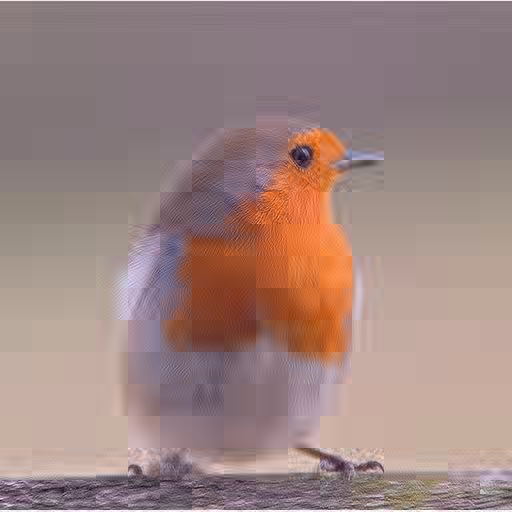

In [12]:
display(Image(filename="/tmp/decoded.png"))

## Using LloydMax